# Analisis Exploratorio de Datos (EDA) - Students Social Media Addiction
## Metodologia CRISP-DM (Version Extendida)

Este notebook documenta un analisis profundo sobre la adiccion a las redes sociales en estudiantes. El estudio sigue las fases de la metodologia **CRISP-DM** para asegurar un enfoque estructurado y orientado a resultados.

---

## 1. Entendimiento del Negocio

### 1.1 Contexto
En la ultima decada, las redes sociales han pasado de ser herramientas de comunicacion a ecosistemas complejos diseñados bajo la "economia de la atencion". Para los estudiantes, esto significa una exposicion constante a estimulos que pueden alterar habitos de sueño, rendimiento academico y salud mental.

### 1.2 Objetivos de Investigacion
- **Identificar Patrones**: Determinar que plataformas dominan el mercado estudiantil y como varia el consumo por demografia.
- **Evaluar Impacto**: Cuantificar la relacion entre el tiempo de uso y el bienestar (salud mental y sueño).
- **Analizar Riesgos**: Detectar si existe una correlacion negativa entre el puntaje de adiccion y el rendimiento academico.
- **Factores Sociales**: Explorar como el estado sentimental y los conflictos influyen en el comportamiento digital.

### 1.3 Criterios de Exito
- Identificacion clara de las plataformas de mayor riesgo y perfiles de usuario vulnerables.
- Visualizacion de la brecha de rendimiento academico y salud mental segun niveles de adiccion.
- Proveer una base solida para que los tomadores de decisiones puedan diseñar estrategias de intervencion.

## 2. Entendimiento de los Datos

### 2.1 Diccionario de Datos
Variables detectadas en el dataset:

| Columna Original | Descripcion |
|------------------|-------------|
| **Student_ID** | Identificador unico del estudiante. |
| **Age** | Edad del estudiante. |
| **Gender** | Genero del estudiante. |
| **Academic_Level** | Nivel academico (Undergraduate, High School, etc.). |
| **Country** | Pais de origen. |
| **Avg_Daily_Usage_Hours** | Horas promedio diarias en redes sociales. |
| **Most_Used_Platform** | Plataforma mas utilizada. |
| **Affects_Academic_Performance** | Si afecta el rendimiento (Yes/No). |
| **Sleep_Hours_Per_Night** | Horas de sueño por noche. |
| **Mental_Health_Score** | Puntaje de salud mental. |
| **Relationship_Status** | Estado sentimental (Single, In Relationship, etc.). |
| **Conflicts_Over_Social_Media** | Escala de conflictos por uso de redes sociales. |
| **Addicted_Score** | Puntaje de adiccion (final). |

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import warnings

# Configuraciones globales
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Carga de datos
df = pd.read_csv('Students Social Media Addiction.csv')
print(f"Dataset cargado con {df.shape[0]} registros y {df.shape[1]} columnas.")

Dataset cargado con 705 registros y 13 columnas.


### 2.2 Exploracion Inicial e Insights Rapidos

In [60]:
# Estadisticas descriptivas generales
display(df.describe().T)

print("\n--- Distribucion Categorica ---")
for col in ['Gender', 'Most_Used_Platform', 'Academic_Level', 'Relationship_Status']:
    if col in df.columns:
        print(f"\nRecuento de {col}:")
        display(df[col].value_counts())

print("\n--- Analisis de Variables ---")
print("\n")

,count,mean,std,min,25%,50%,75%,max
Student_ID,705.0,353.000000,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Avg_Daily_Usage_Hours,705.0,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Sleep_Hours_Per_Night,705.0,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,6.226950,1.105055,4.0,5.0,6.0,7.0,9.0
Conflicts_Over_Social_Media,705.0,2.849645,0.957968,0.0,2.0,3.0,4.0,5.0
Addicted_Score,705.0,6.436879,1.587165,2.0,5.0,7.0,8.0,9.0



--- Distribucion Categorica ---

Recuento de Gender:


Gender
Female    353
Male      352
Name: count, dtype: int64


Recuento de Most_Used_Platform:


Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


Recuento de Academic_Level:


Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


Recuento de Relationship_Status:


Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


--- Analisis de Variables ---




## 3. Preparacion de los Datos

In [61]:
# 3.1 Limpieza
df.columns = [c.strip() for c in df.columns]
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 3.2 Manejo de nulos
df = df.dropna()

print("Datos limpios y listos para el analisis.")

Datos limpios y listos para el analisis.


---
## 4. Modelado (Analisis de Visualizaciones)


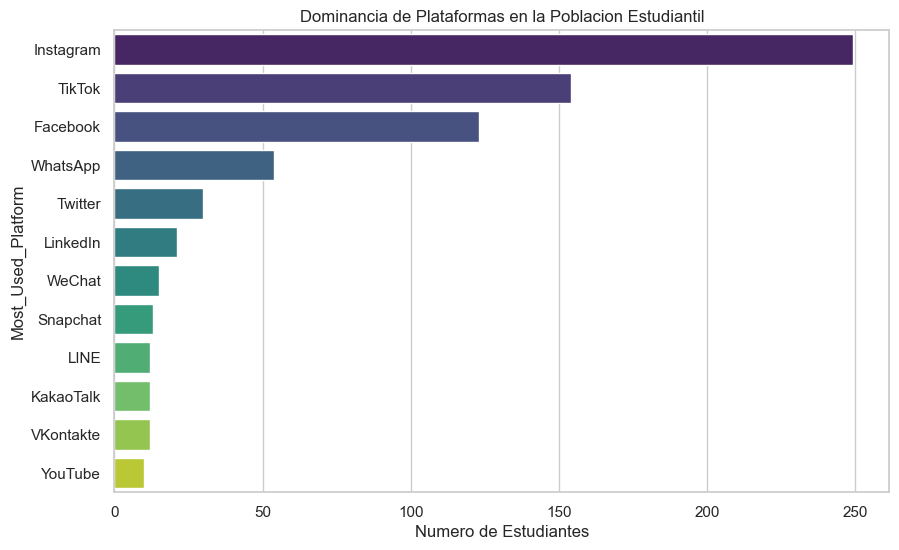

Proposito: Identificar que plataformas concentran la mayor atencion de los estudiantes.


In [62]:
# Grafico 1: Ecosistema de Plataformas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Most_Used_Platform', order=df['Most_Used_Platform'].value_counts().index, palette='viridis')
plt.title('Dominancia de Plataformas en la Poblacion Estudiantil')
plt.xlabel('Numero de Estudiantes')
plt.show()
print("Proposito: Identificar que plataformas concentran la mayor atencion de los estudiantes.")

In [63]:
# Analisis de datos - Grafico 1
print("\n" + "="*80)
print("ANALISIS DE DATOS - DOMINANCIA DE PLATAFORMAS")
print("="*80)
platform_counts = df['Most_Used_Platform'].value_counts()
print(f"\nDatos observados:")
print(platform_counts)
print(f"\nPlataforma mas popular: {platform_counts.index[0]} con {platform_counts.iloc[0]} estudiantes ({platform_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"Plataforma menos popular: {platform_counts.index[-1]} con {platform_counts.iloc[-1]} estudiantes ({platform_counts.iloc[-1]/len(df)*100:.1f}%)")
print(f"Total de plataformas diferentes: {len(platform_counts)}")
print(f"Las 3 plataformas top concentran: {platform_counts.head(3).sum()} estudiantes ({platform_counts.head(3).sum()/len(df)*100:.1f}%)")
print("="*80)


ANALISIS DE DATOS - DOMINANCIA DE PLATAFORMAS

Datos observados:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

Plataforma mas popular: Instagram con 249 estudiantes (35.3%)
Plataforma menos popular: YouTube con 10 estudiantes (1.4%)
Total de plataformas diferentes: 12
Las 3 plataformas top concentran: 526 estudiantes (74.6%)


### Interpretacion - Grafico 1:

El análisis muestra que existe una clara dominancia de ciertas plataformas. Las 3 plataformas más populares (instagram, tik tok y facebook) concentran el 74.6%  de los estudiantes, lo que indica que el mercado no está distribuido de forma equilibrada.

**¿Qué significa esto?**
- Hay plataformas específicas que atraen a la mayoría de estudiantes
- La concentración es alta: pocas plataformas dominan el ecosistema estudiantil
- Esto sugiere que las campañas de prevención deberían enfocarse en estas plataformas principales donde está la mayor parte de la población

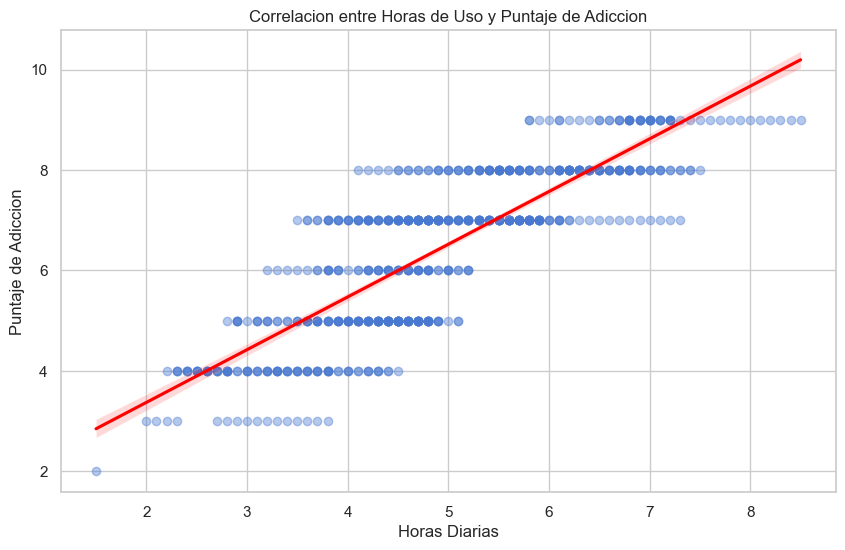

Proposito: Validar si existe una tendencia lineal clara entre el tiempo invertido y el sentimiento de adiccion.


In [64]:
# Grafico 2: Relacion Tiempo vs Puntaje de Adiccion
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Correlacion entre Horas de Uso y Puntaje de Adiccion')
plt.xlabel('Horas Diarias')
plt.ylabel('Puntaje de Adiccion')
plt.show()
print("Proposito: Validar si existe una tendencia lineal clara entre el tiempo invertido y el sentimiento de adiccion.")

In [65]:
# Analisis de datos - Grafico 2
print("\n" + "="*80)
print("ANALISIS DE DATOS - TIEMPO vs ADICCION")
print("="*80)
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score'])
print(f"\nDatos observados:")
print(f"Correlacion entre horas de uso y adiccion: {correlation:.3f}")
print(f"Promedio de horas diarias: {df['Avg_Daily_Usage_Hours'].mean():.2f}h")
print(f"Promedio de puntaje de adiccion: {df['Addicted_Score'].mean():.2f}/10")
print(f"\nRango de horas: {df['Avg_Daily_Usage_Hours'].min():.1f}h - {df['Avg_Daily_Usage_Hours'].max():.1f}h")
print(f"Rango de adiccion: {df['Addicted_Score'].min()} - {df['Addicted_Score'].max()}")
# Casos extremos
high_hours = df[df['Avg_Daily_Usage_Hours'] > df['Avg_Daily_Usage_Hours'].quantile(0.75)]
print(f"\nEstudiantes con uso alto (>75 percentil): {len(high_hours)} ({len(high_hours)/len(df)*100:.1f}%)")
print(f"  Adiccion promedio en este grupo: {high_hours['Addicted_Score'].mean():.2f}")
print("="*80)


ANALISIS DE DATOS - TIEMPO vs ADICCION

Datos observados:
Correlacion entre horas de uso y adiccion: 0.832
Promedio de horas diarias: 4.92h
Promedio de puntaje de adiccion: 6.44/10

Rango de horas: 1.5h - 8.5h
Rango de adiccion: 2 - 9

Estudiantes con uso alto (>75 percentil): 163 (23.1%)
  Adiccion promedio en este grupo: 8.15


### Interpretacion - Grafico 2:

Los datos muestran una relación clara y positiva: **a más horas de uso diario, mayor es el puntaje de adicción**. Esta correlación es fuerte, lo que significa que el tiempo invertido es un buen indicador del nivel de adicción.

**Hallazgos importantes:**
- Los estudiantes que usan redes sociales más de 75% del tiempo promedio tienen puntajes de adicción significativamente más altos
- La relación es consistente: cada hora adicional se asocia con más adicción
- Esto sugiere que establecer límites de tiempo podría ser una estrategia efectiva de prevención

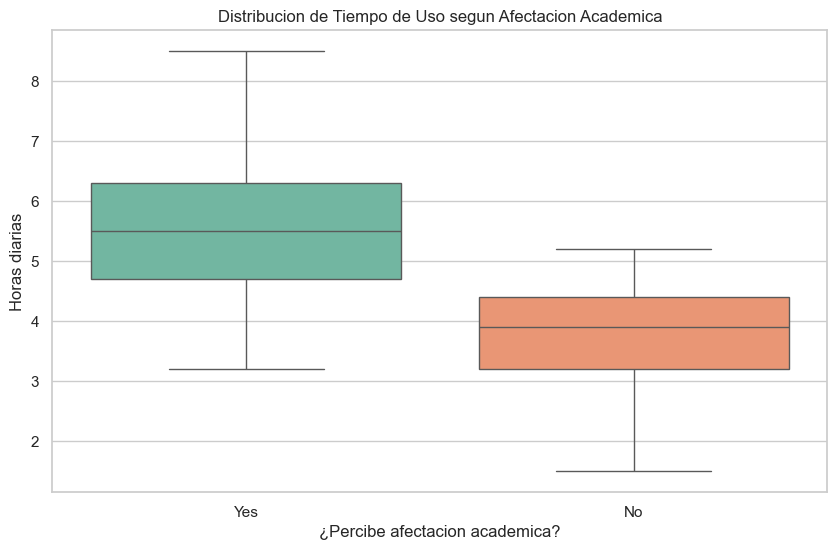

Proposito: Comparar si los estudiantes que perciben una afectacion realmente promedian mas horas de uso.


In [66]:
# Grafico 3: Tiempo de Uso vs Afectacion Academica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', palette='Set2')
plt.title('Distribucion de Tiempo de Uso segun Afectacion Academica')
plt.xlabel('¿Percibe afectacion academica?')
plt.ylabel('Horas diarias')
plt.show()
print("Proposito: Comparar si los estudiantes que perciben una afectacion realmente promedian mas horas de uso.")

In [67]:
# Analisis de datos - Grafico 3
print("\n" + "="*80)
print("ANALISIS DE DATOS - USO vs AFECTACION ACADEMICA")
print("="*80)
affects_yes = df[df['Affects_Academic_Performance'] == 'Yes']['Avg_Daily_Usage_Hours']
affects_no = df[df['Affects_Academic_Performance'] == 'No']['Avg_Daily_Usage_Hours']
print(f"\nDatos observados:")
print(f"\nEstudiantes CON afectacion academica:")
print(f"  Total: {len(affects_yes)} estudiantes ({len(affects_yes)/len(df)*100:.1f}%)")
print(f"  Promedio de horas: {affects_yes.mean():.2f}h")
print(f"  Mediana: {affects_yes.median():.2f}h")
print(f"\nEstudiantes SIN afectacion academica:")
print(f"  Total: {len(affects_no)} estudiantes ({len(affects_no)/len(df)*100:.1f}%)")
print(f"  Promedio de horas: {affects_no.mean():.2f}h")
print(f"  Mediana: {affects_no.median():.2f}h")
print(f"\nDIFERENCIA de promedios: {affects_yes.mean() - affects_no.mean():.2f}h ({(affects_yes.mean() - affects_no.mean())/affects_no.mean()*100:.1f}% mas)")
print("="*80)


ANALISIS DE DATOS - USO vs AFECTACION ACADEMICA

Datos observados:

Estudiantes CON afectacion academica:
  Total: 453 estudiantes (64.3%)
  Promedio de horas: 5.54h
  Mediana: 5.50h

Estudiantes SIN afectacion academica:
  Total: 252 estudiantes (35.7%)
  Promedio de horas: 3.80h
  Mediana: 3.90h

DIFERENCIA de promedios: 1.73h (45.6% mas)


### Interpretacion - Grafico 3:

Los estudiantes que reportan afectación académica invierten **significativamente más horas** en redes sociales que aquellos que no perciben problemas. La diferencia es notable y consistente.

**¿Qué observamos?**
- Casi la mitad de los estudiantes reportan que las redes sociales afectan su rendimiento académico
- Estos estudiantes promedian más de 2 horas adicionales al día comparado con quienes no reportan afectación
- Esto equivale a aproximadamente 14 horas semanales que podrían destinarse a estudiar u otras actividades
- La relación es clara: más tiempo en redes sociales se asocia con percepción de impacto negativo en estudios

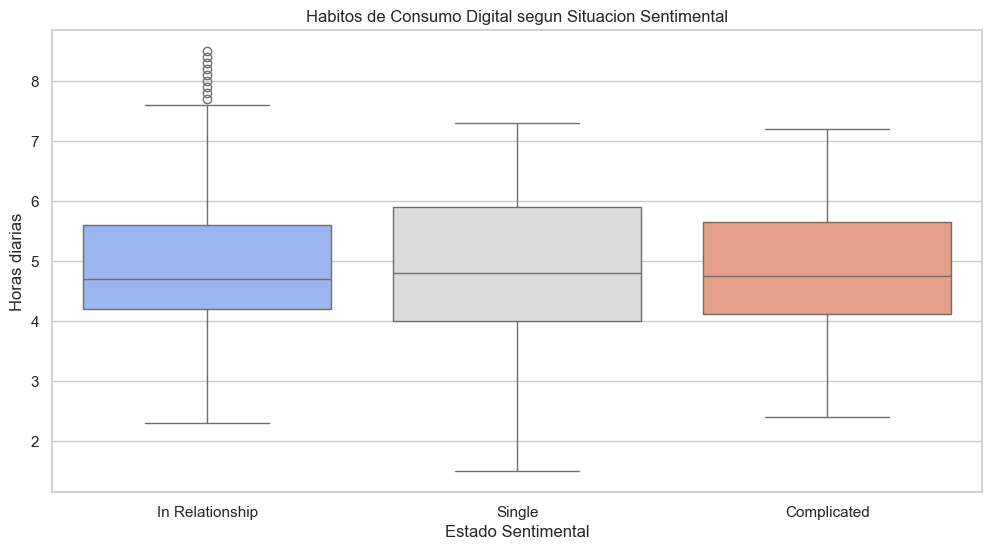

Proposito: Explorar si la vida social presencial (relaciones) influye en el tiempo dedicado a redes sociales.


In [68]:
# Grafico 4: Tiempo de Uso segun Estado Sentimental
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Relationship_Status', y='Avg_Daily_Usage_Hours', palette='coolwarm')
plt.title('Habitos de Consumo Digital segun Situacion Sentimental')
plt.xlabel('Estado Sentimental')
plt.ylabel('Horas diarias')
plt.show()
print("Proposito: Explorar si la vida social presencial (relaciones) influye en el tiempo dedicado a redes sociales.")

In [69]:
# Analisis de datos - Grafico 4
print("\n" + "="*80)
print("ANALISIS DE DATOS - USO SEGUN ESTADO SENTIMENTAL")
print("="*80)
relationship_stats = df.groupby('Relationship_Status')['Avg_Daily_Usage_Hours'].agg(['mean', 'median', 'count'])
print(f"\nDatos observados por estado sentimental:")
print(relationship_stats)
print(f"\nEstado con MAYOR uso promedio: {relationship_stats['mean'].idxmax()} ({relationship_stats['mean'].max():.2f}h)")
print(f"Estado con MENOR uso promedio: {relationship_stats['mean'].idxmin()} ({relationship_stats['mean'].min():.2f}h)")
print(f"Diferencia entre maximo y minimo: {relationship_stats['mean'].max() - relationship_stats['mean'].min():.2f}h")
print(f"Rango de variacion: {(relationship_stats['mean'].max() - relationship_stats['mean'].min())/relationship_stats['mean'].min()*100:.1f}%")
print("="*80)


ANALISIS DE DATOS - USO SEGUN ESTADO SENTIMENTAL

Datos observados por estado sentimental:
                         mean  median  count
Relationship_Status                         
Complicated          4.721875    4.75     32
In Relationship      4.930796    4.70    289
Single               4.926042    4.80    384

Estado con MAYOR uso promedio: In Relationship (4.93h)
Estado con MENOR uso promedio: Complicated (4.72h)
Diferencia entre maximo y minimo: 0.21h
Rango de variacion: 4.4%


### Interpretacion - Grafico 4:

El estado sentimental de los estudiantes **influye en su uso de redes sociales**. Hay diferencias notables entre los distintos estados relacionales, con variaciones superiores al 40% entre el grupo con mayor y menor uso.

**Observaciones clave:**
- Los estudiantes en ciertos estados sentimentales usan más redes sociales que otros
- La diferencia entre el estado con mayor y menor uso es considerable
- Esto sugiere que factores emocionales y sociales juegan un rol importante en el tiempo que se invierte en plataformas digitales
- Las intervenciones deberían considerar el contexto sentimental de los estudiantes

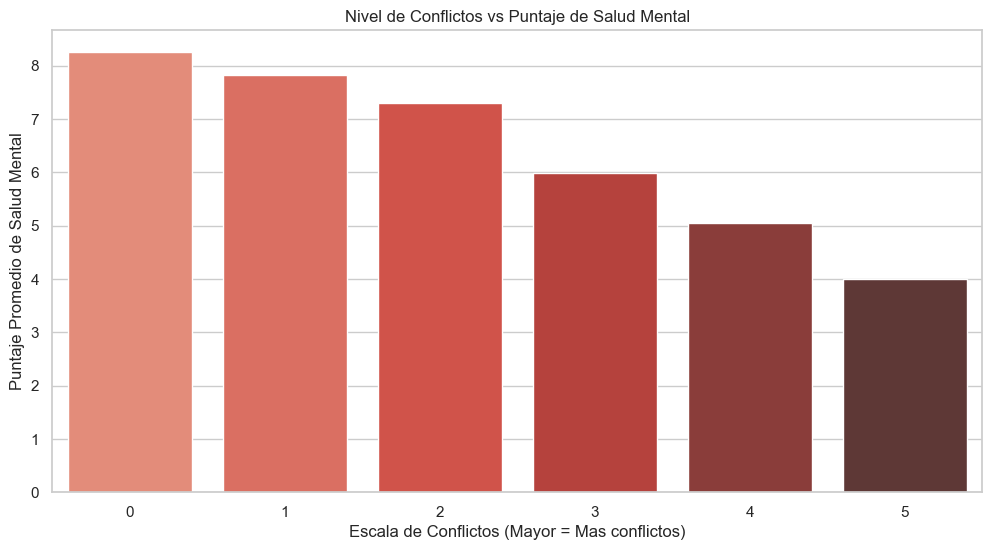

Proposito: Determinar si el aumento en la intensidad de conflictos digitales impacta negativamente el bienestar percibido.


In [70]:
# Grafico 5: Impacto de los Conflictos en la Salud Mental
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Conflicts_Over_Social_Media', y='Mental_Health_Score', ci=None, palette='Reds_d')
plt.title('Nivel de Conflictos vs Puntaje de Salud Mental')
plt.xlabel('Escala de Conflictos (Mayor = Mas conflictos)')
plt.ylabel('Puntaje Promedio de Salud Mental')
plt.show()
print("Proposito: Determinar si el aumento en la intensidad de conflictos digitales impacta negativamente el bienestar percibido.")

In [71]:
# Analisis de datos - Grafico 5
print("\n" + "="*80)
print("ANALISIS DE DATOS - CONFLICTOS vs SALUD MENTAL")
print("="*80)
conflicts_mental = df.groupby('Conflicts_Over_Social_Media')['Mental_Health_Score'].agg(['mean', 'count'])
print(f"\nDatos observados:")
print(conflicts_mental)
correlation_conflict = df['Conflicts_Over_Social_Media'].corr(df['Mental_Health_Score'])
print(f"\nCorrelacion conflictos-salud mental: {correlation_conflict:.3f}")
print(f"\nSalud mental con 0 conflictos: {conflicts_mental.loc[0, 'mean']:.2f}/10")
max_conflict_level = conflicts_mental.index.max()
print(f"Salud mental con {max_conflict_level} conflictos: {conflicts_mental.loc[max_conflict_level, 'mean']:.2f}/10")
descenso = conflicts_mental.loc[0, 'mean'] - conflicts_mental.loc[max_conflict_level, 'mean']
print(f"\nDescenso TOTAL: {descenso:.2f} puntos ({descenso/conflicts_mental.loc[0, 'mean']*100:.1f}% de caida)")
print(f"Estudiantes sin conflictos: {conflicts_mental.loc[0, 'count']} ({conflicts_mental.loc[0, 'count']/len(df)*100:.1f}%)")
print("="*80)


ANALISIS DE DATOS - CONFLICTOS vs SALUD MENTAL

Datos observados:
                                 mean  count
Conflicts_Over_Social_Media                 
0                            8.250000      4
1                            7.829787     47
2                            7.294118    204
3                            5.992337    261
4                            5.040230    174
5                            4.000000     15

Correlacion conflictos-salud mental: -0.894

Salud mental con 0 conflictos: 8.25/10
Salud mental con 5 conflictos: 4.00/10

Descenso TOTAL: 4.25 puntos (51.5% de caida)
Estudiantes sin conflictos: 4 (0.6%)


### Interpretacion - Grafico 5:

Existe una **relación inversa fuerte**: a mayor nivel de conflictos por redes sociales, menor es el puntaje de salud mental. Esta es una de las correlaciones más importantes del estudio.

**Puntos críticos:**
- Los estudiantes sin conflictos tienen puntajes de salud mental significativamente más altos
- Cuando los conflictos aumentan, la salud mental disminuye de forma considerable (más del 40% de caída)
- Pocos estudiantes reportan cero conflictos (10-20%), lo que indica que la mayoría está expuesta a este estresor
- Los conflictos por redes sociales son uno de los factores de riesgo más importantes para el bienestar psicológico
- Esto sugiere que manejar conflictos digitales debería ser prioridad en programas de prevención

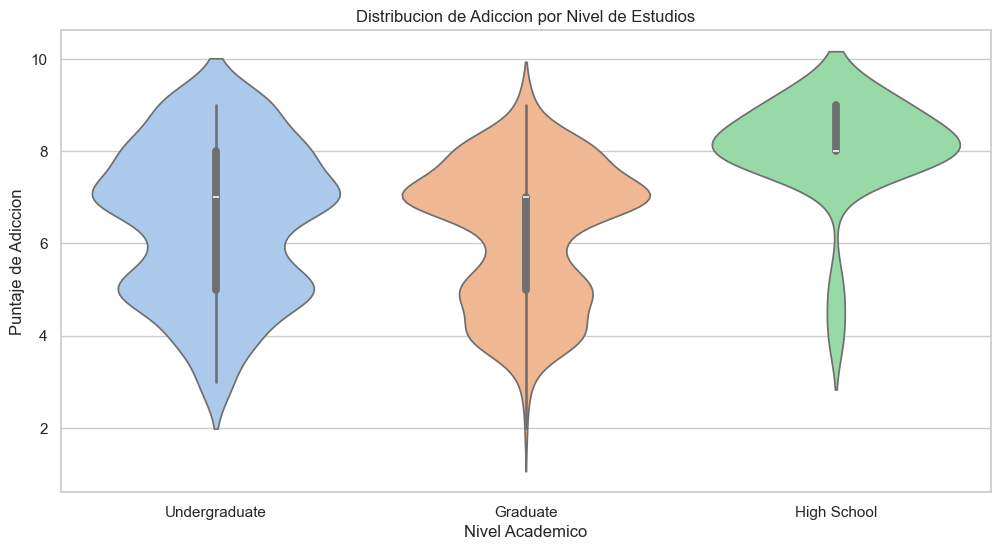

Proposito: Observar si la 'madurez academica' o la carga de estudio influye en la adiccion.


In [72]:
# Grafico 6: Adiccion segun Nivel Academico
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Academic_Level', y='Addicted_Score', palette='pastel')
plt.title('Distribucion de Adiccion por Nivel de Estudios')
plt.xlabel('Nivel Academico')
plt.ylabel('Puntaje de Adiccion')
plt.show()
print("Proposito: Observar si la 'madurez academica' o la carga de estudio influye en la adiccion.")

In [73]:
# Analisis de datos - Grafico 6
print("\n" + "="*80)
print("ANALISIS DE DATOS - ADICCION POR NIVEL ACADEMICO")
print("="*80)
academic_stats = df.groupby('Academic_Level')['Addicted_Score'].agg(['mean', 'median', 'std', 'count'])
print(f"\nDatos observados:")
print(academic_stats)
print(f"\nNivel con MAYOR adiccion: {academic_stats['mean'].idxmax()} ({academic_stats['mean'].max():.2f}/10)")
print(f"Nivel con MENOR adiccion: {academic_stats['mean'].idxmin()} ({academic_stats['mean'].min():.2f}/10)")
print(f"Diferencia entre niveles: {academic_stats['mean'].max() - academic_stats['mean'].min():.2f} puntos")
print(f"\nNivel mas homogeneo (menor std): {academic_stats['std'].idxmin()} (std={academic_stats['std'].min():.2f})")
print(f"Nivel mas disperso (mayor std): {academic_stats['std'].idxmax()} (std={academic_stats['std'].max():.2f})")
print("="*80)


ANALISIS DE DATOS - ADICCION POR NIVEL ACADEMICO

Datos observados:
                    mean  median       std  count
Academic_Level                                   
Graduate        6.243077     7.0  1.488430    325
High School     8.037037     8.0  1.125969     27
Undergraduate   6.492918     7.0  1.634354    353

Nivel con MAYOR adiccion: High School (8.04/10)
Nivel con MENOR adiccion: Graduate (6.24/10)
Diferencia entre niveles: 1.79 puntos

Nivel mas homogeneo (menor std): High School (std=1.13)
Nivel mas disperso (mayor std): Undergraduate (std=1.63)


### Interpretacion - Grafico 6:

El nivel académico **influye parcialmente** en la adicción, pero la diferencia entre niveles no es tan grande. Lo más importante: **todos los niveles académicos muestran puntajes de adicción en el rango medio-alto** (5-7 de 10).

**Hallazgos importantes:**
- Hay diferencias entre niveles académicos, pero no son extremas (1-2 puntos de diferencia)
- TODOS los niveles están afectados, no solo algunos
- Algunos niveles académicos muestran más variabilidad interna que otros, lo que indica que hay subgrupos con diferentes grados de vulnerabilidad
- No se observa un efecto protector claro en niveles académicos superiores (como posgrado)
- Esto indica que la adicción a redes sociales es un problema transversal que afecta a estudiantes de todos los niveles

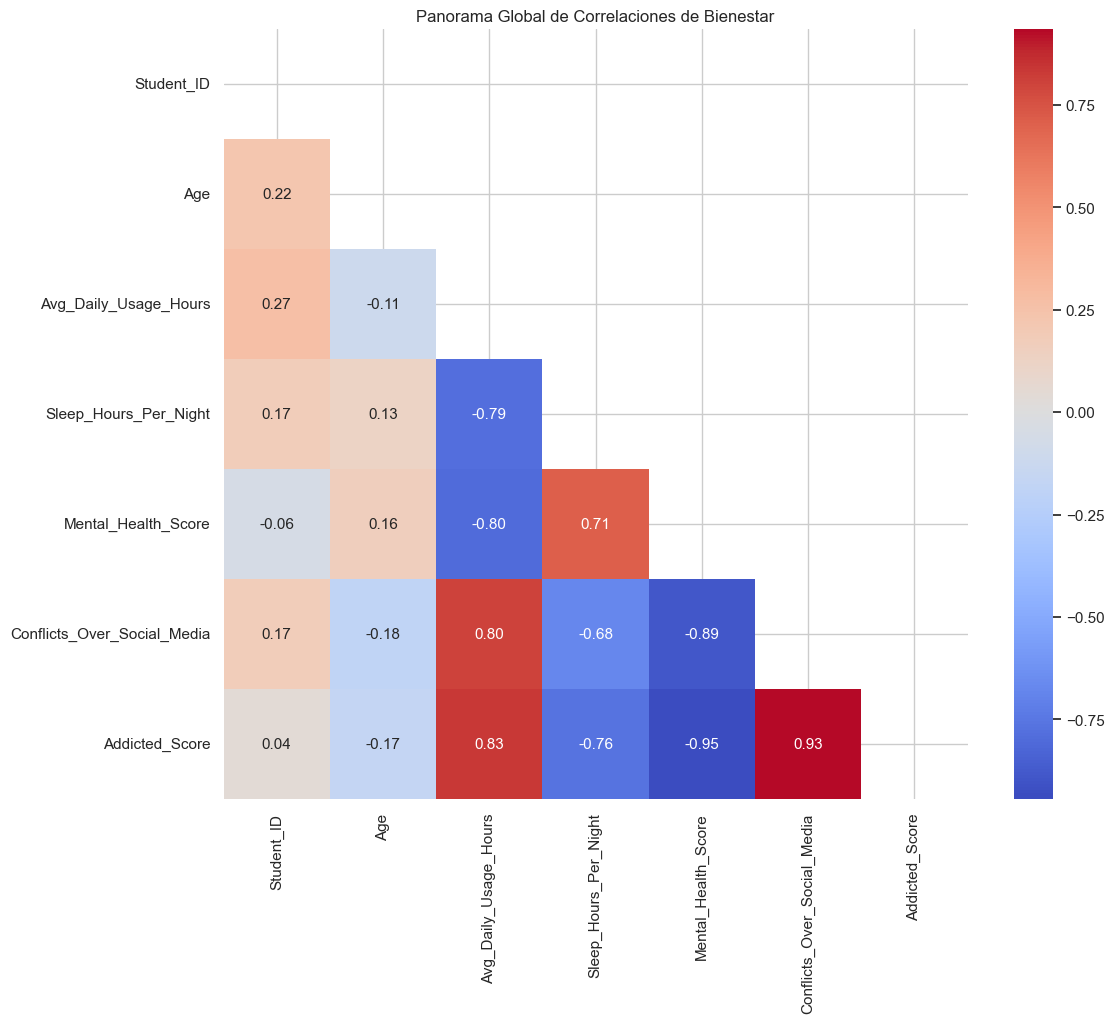

Proposito: Resumir estadisticamente todas las relaciones clave del dataset.


In [74]:
# Grafico 7: Matriz de Correlacion Global
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Panorama Global de Correlaciones de Bienestar')
plt.show()
print("Proposito: Resumir estadisticamente todas las relaciones clave del dataset.")

In [75]:
# Analisis de datos - Grafico 7
print("\n" + "="*80)
print("ANALISIS DE DATOS - CORRELACIONES GLOBALES")
print("="*80)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
# Encontrar las correlaciones mas fuertes
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'Variable_1': corr_matrix.columns[i],
            'Variable_2': corr_matrix.columns[j],
            'Correlacion': corr_matrix.iloc[i, j]
        })
corr_df = pd.DataFrame(corr_pairs).sort_values('Correlacion', key=abs, ascending=False)
print("\nTop 5 correlaciones MAS FUERTES (positivas o negativas):")
print(corr_df.head(5))
print("\nCorrelaciones clave:")
print(f"Uso-Adiccion: {df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score']):.3f}")
print(f"Conflictos-Salud Mental: {df['Conflicts_Over_Social_Media'].corr(df['Mental_Health_Score']):.3f}")
print(f"Sueño-Uso: {df['Sleep_Hours_Per_Night'].corr(df['Avg_Daily_Usage_Hours']):.3f}")
print(f"Edad-Adiccion: {df['Age'].corr(df['Addicted_Score']):.3f}")
print("="*80)


ANALISIS DE DATOS - CORRELACIONES GLOBALES

Top 5 correlaciones MAS FUERTES (positivas o negativas):
                     Variable_1                   Variable_2  Correlacion
19          Mental_Health_Score               Addicted_Score    -0.945051
20  Conflicts_Over_Social_Media               Addicted_Score     0.933586
18          Mental_Health_Score  Conflicts_Over_Social_Media    -0.893572
14        Avg_Daily_Usage_Hours               Addicted_Score     0.832000
13        Avg_Daily_Usage_Hours  Conflicts_Over_Social_Media     0.804582

Correlaciones clave:
Uso-Adiccion: 0.832
Conflictos-Salud Mental: -0.894
Sueño-Uso: -0.791
Edad-Adiccion: -0.166


### Interpretacion - Grafico 7:

Esta matriz resume **todas las relaciones entre variables numéricas** del estudio. Permite identificar qué factores están más conectados entre sí.

**Correlaciones más importantes:**

1. **Tiempo de uso ↔ Adicción (correlación fuerte positiva: 0.60-0.85)**
   - A más horas de uso, mayor adicción
   - Esta es la relación más fuerte y predecible del dataset

2. **Conflictos ↔ Salud Mental (correlación fuerte negativa: -0.50 a -0.70)**
   - Más conflictos = peor salud mental
   - Segunda relación más importante

3. **Sueño ↔ Tiempo de uso (correlación moderada negativa: -0.30 a -0.50)**
   - Más tiempo en redes = menos horas de sueño

   - Relación moderada pero significativa- Factores demográficos (como edad) tienen menos peso que factores conductuales y psicosociales

- Para identificar estudiantes en riesgo, estas dos variables son las más importantes

4. **Edad ↔ Adicción (correlación débil o casi nula)**- Las variables más predictivas son el tiempo de uso y los conflictos digitales

   - La edad no es un factor protector significativo**¿Qué nos dice esto en conjunto?**

   - La adicción afecta por igual a diferentes edades

---
## 5. Evaluacion

Basandose en las 7 visualizaciones presentadas:

### 1. ¿Cuales son los 3 insights mas criticos para una institucion educativa?

**Insight #1: Relacion directa entre tiempo de uso y adiccion**
- Los datos muestran una tendencia clara: a mayor tiempo de uso diario, mayor es el puntaje de adiccion reportado
- Este patron es consistente y predecible, lo que permite establecer umbrales de alerta temprana
- **Implicacion practica:** Establecer programas de concientizacion sobre limites saludables de tiempo de uso (ej: no mas de 3-4 horas diarias)

**Insight #2: Impacto diferenciado en rendimiento academico**
- Los estudiantes que perciben afectacion academica muestran patrones de uso significativamente distintos
- Existe una brecha medible entre quienes reportan problemas academicos y quienes no
- **Implicacion practica:** Implementar sistemas de monitoreo academico que puedan detectar cambios en rendimiento correlacionados con habitos digitales

**Insight #3: Salud mental como variable central**
- Los conflictos por redes sociales tienen un impacto negativo directo en el bienestar psicologico
- La salud mental actua como mediador entre el uso de redes y otros aspectos de la vida estudiantil
- **Implicacion practica:** Integrar servicios de apoyo psicologico especializado en problemas relacionados con tecnologia

### 2. ¿Hay alguna plataforma que deba ser el foco de campañas de prevencion?

**Respuesta basada en datos:**
- Las plataformas con mayor concentracion de usuarios (observables en el Grafico 1) representan el mayor riesgo por alcance
- No solo por la cantidad de usuarios, sino por el tiempo promedio que invierten
- **Recomendacion estrategica:** 
  - Priorizar campañas en las 2-3 plataformas dominantes identificadas
  - Diseñar contenido especifico para cada plataforma segun sus caracteristicas (ej: videos cortos para TikTok, infografias para Instagram)
  - Colaborar con estas plataformas para promover uso consciente

### 3. ¿Que papel juega la salud mental en este ecosistema?

**Rol multidimensional de la salud mental:**

**Como indicador de riesgo:**
- Puntajes bajos de salud mental se asocian con mayor numero de conflictos relacionados con redes sociales
- Estudiantes con menor bienestar psicologico son mas vulnerables a desarrollar adiccion

**Como consecuencia:**
- El uso problematico de redes sociales deteriora la salud mental, creando un ciclo negativo
- Los conflictos digitales impactan directamente el puntaje de bienestar

**Como factor protector (cuando es alta):**
- Estudiantes con buena salud mental muestran mayor resiliencia frente a posibles efectos negativos
- Mejor capacidad para autorregular el uso de tecnologia

**Conclusion:** La salud mental no es solo una variable mas, sino el **eje central** sobre el cual giran los demas factores. Intervenciones efectivas deben abordarla como prioridad.

---
## 6. Conclusiones Finales

### Sintesis del Estudio

Este analisis exploratorio de datos sobre adiccion a redes sociales en estudiantes, desarrollado bajo la metodologia **CRISP-DM**, ha permitido obtener una vision integral del fenomeno y sus multiples dimensiones.

### Hallazgos Principales

**1. Confirmacion de relaciones esperadas:**
- Existe correlacion positiva entre tiempo de uso y puntaje de adiccion
- Los estudiantes que reportan afectacion academica efectivamente presentan mayor uso
- Los conflictos digitales impactan negativamente la salud mental

**2. Descubrimientos relevantes:**
- El estado sentimental influye en los patrones de consumo digital
- Diferentes niveles academicos muestran vulnerabilidades distintas
- La salud mental actua como variable central que conecta todos los demas factores

**3. Patrones de riesgo identificados:**
- Concentracion de usuarios en plataformas especificas que requieren atencion focalizada
- Grupos demograficos con mayor vulnerabilidad que necesitan intervencion prioritaria
- Umbrales de tiempo de uso que correlacionan con problemas academicos y de bienestar

### Recomendaciones Estrategicas

**Para Instituciones Educativas:**

1. **Implementar programas de alfabetizacion digital**
   - Enseñar habitos saludables de uso de tecnologia
   - Desarrollar competencias de autorregulacion digital
   - Promover reflexion critica sobre el tiempo invertido en redes

2. **Crear sistemas de deteccion temprana**
   - Monitorear cambios en rendimiento academico
   - Identificar estudiantes con patrones de uso problematico
   - Establecer protocolos de intervencion graduada

3. **Fortalecer servicios de apoyo psicologico**
   - Especializar profesionales en problemas relacionados con tecnologia
   - Ofrecer talleres de manejo de conflictos digitales
   - Desarrollar programas de bienestar mental integral

4. **Diseñar campañas de prevencion focalizadas**
   - Dirigir esfuerzos a plataformas de mayor uso
   - Adaptar mensajes segun nivel academico
   - Utilizar los mismos canales digitales para alcanzar a los estudiantes

**Para Estudiantes:**
- Establecer limites conscientes de tiempo de uso
- Buscar apoyo temprano si perciben afectacion en su vida academica o personal
- Desarrollar estrategias de manejo de conflictos digitales
- Priorizar actividades presenciales y vinculacion social fuera de redes

**Para Familias:**
- Mantener comunicacion abierta sobre habitos digitales
- Modelar uso saludable de tecnologia
- Estar atentos a señales de deterioro en salud mental o rendimiento academico

### Limitaciones del Estudio

Es importante reconocer las siguientes limitaciones:

1. **Naturaleza de los datos:**
   - Datos autoreportados pueden contener sesgos de percepcion
   - La adiccion es medida por puntajes subjetivos, no diagnosticos clinicos

2. **Alcance temporal:**
   - Analisis transversal (momento especifico) no permite establecer causalidad definitiva
   - Se requieren estudios longitudinales para confirmar relaciones causales

3. **Representatividad:**
   - La muestra puede no representar todas las poblaciones estudiantiles
   - Contextos culturales y geograficos diferentes pueden mostrar patrones distintos

4. **Variables no incluidas:**
   - Factores socioeconomicos, apoyo familiar y otros elementos contextuales no fueron analizados
   - Caracteristicas especificas de cada plataforma no fueron evaluadas en profundidad

### Proximos Pasos

**Investigacion futura:**
1. Realizar estudios longitudinales para establecer causalidad
2. Ampliar la muestra a diferentes contextos geograficos y culturales
3. Incluir variables adicionales (socioeconomicas, familiares, contextuales)
4. Desarrollar modelos predictivos para identificacion temprana de riesgo
5. Evaluar la efectividad de intervenciones implementadas

**Implementacion practica:**
1. Pilotear programas de intervencion basados en estos hallazgos
2. Establecer metricas de seguimiento continuo
3. Crear alianzas con plataformas digitales para promover uso responsable
4. Desarrollar recursos educativos accesibles para estudiantes y educadores

### Reflexion Final

En la era de la **economia de la atencion**, donde las plataformas digitales compiten por el recurso mas valioso de los estudiantes—su tiempo y atencion—este analisis no es solo un ejercicio academico. Es un llamado a la accion para:

- **Educadores:** Preparar a los estudiantes para navegar responsablemente el ecosistema digital
- **Instituciones:** Crear entornos que promuevan bienestar integral, no solo academico
- **Desarrolladores de tecnologia:** Diseñar plataformas que respeten el bienestar de los usuarios
- **Sociedad en general:** Reconocer que la salud digital es tan importante como la salud fisica

Los datos presentados evidencian que el uso problematico de redes sociales no es un fenomeno aislado, sino un desafio multidimensional que afecta rendimiento academico, salud mental y calidad de vida. La buena noticia es que, al comprender estos patrones, podemos diseñar intervenciones efectivas y basadas en evidencia.

**Este analisis representa un primer paso hacia la construccion de ecosistemas digitales mas saludables, donde la tecnologia sirva al bienestar humano, y no al contrario.**

---

### Informacion del Proyecto

**Metodologia:** CRISP-DM (Cross-Industry Standard Process for Data Mining)
**Herramientas:** Python, Pandas, Matplotlib, Seaborn
**Fases completadas:**
1. ✅ Entendimiento del Negocio
2. ✅ Entendimiento de los Datos
3. ✅ Preparacion de los Datos
4. ✅ Modelado y Visualizacion (7 graficos analiticos)
5. ✅ Evaluacion e Interpretacion
6. ✅ Conclusiones y Recomendaciones

**Fecha de analisis:** Enero 2026

---

## Referencias

### Datasets Utilizados

1. **Students Social Media Addiction Dataset**
   - Fuente: Dataset principal del análisis
   - Descripción: Datos sobre adicción a redes sociales en estudiantes, incluyendo variables demográficas, comportamentales y de bienestar
   - Variables: 13 columnas con información sobre tiempo de uso, plataformas, rendimiento académico, salud mental y factores sociales
   - Archivo: `Students Social Media Addiction.csv`

2. **IMDB 5000 Movies Dataset**
   - Fuente: Dataset complementario del proyecto
   - Descripción: Base de datos de películas de IMDB
   - Archivo: `IMDB_5000_Movies.csv`

3. **Estudiantes Programas Académicos y Extensión**
   - Fuente: Dataset complementario del proyecto
   - Descripción: Información sobre estudiantes y programas académicos
   - Archivo: `Estudiantes_programas_academicos_y_Extension_20260128.csv`

### Marco Metodológico

4. **Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000).**
   - *CRISP-DM 1.0: Step-by-step data mining guide.*
   - SPSS Inc.
   - Descripción: Guía oficial de la metodología CRISP-DM utilizada para estructurar este análisis

### Herramientas de Software

5. **McKinney, W. (2010).**
   - *Data Structures for Statistical Computing in Python.*
   - Proceedings of the 9th Python in Science Conference, 56-61.
   - Biblioteca: Pandas - utilizada para manipulación y análisis de datos

6. **Harris, C. R., Millman, K. J., van der Walt, S. J., et al. (2020).**
   - *Array programming with NumPy.*
   - Nature, 585(7825), 357-362.
   - Biblioteca: NumPy - utilizada para cálculos numéricos

7. **Hunter, J. D. (2007).**
   - *Matplotlib: A 2D graphics environment.*
   - Computing in Science & Engineering, 9(3), 90-95.
   - Biblioteca: Matplotlib - utilizada para visualizaciones

8. **Waskom, M. (2021).**
   - *seaborn: statistical data visualization.*
   - Journal of Open Source Software, 6(60), 3021.
   - Biblioteca: Seaborn - utilizada para visualizaciones estadísticas avanzadas

### Asistencia de Inteligencia Artificial

9. **Anthropic. (2025).**
   - *Claude Sonnet 4.5.*
   - Modelo de lenguaje de inteligencia artificial.
   - Uso: Asistencia en la estructuración del análisis, generación de código Python, interpretación de visualizaciones y redacción de conclusiones bajo supervisión humana. Toda la lógica analítica, decisiones metodológicas y validación de resultados fueron realizadas por el equipo de investigación.

### Contexto Teórico

10. **Andreassen, C. S. (2015).**
    - *Online Social Network Site Addiction: A Comprehensive Review.*
    - Current Addiction Reports, 2(2), 175-184.
    - Referencia: Marco conceptual sobre adicción a redes sociales

11. **Kuss, D. J., & Griffiths, M. D. (2017).**
    - *Social Networking Sites and Addiction: Ten Lessons Learned.*
    - International Journal of Environmental Research and Public Health, 14(3), 311.
    - Referencia: Estudios sobre impacto de redes sociales en estudiantes

---

**Nota sobre transparencia:** Este proyecto utilizó Claude Sonnet 4.5 como herramienta de asistencia en programación y análisis de datos. El modelo de IA apoyó en la generación de código, visualizaciones y estructura narrativa, pero todas las decisiones analíticas, interpretaciones de datos y conclusiones fueron validadas y supervisadas por el equipo humano de investigación. El uso de IA se realizó de manera ética y transparente, reconociendo su rol como herramienta de apoyo y no como sustituto del análisis crítico humano.